<a href="https://colab.research.google.com/github/gibsonea/Biostats/blob/main/tree/main/LabSolutions/Solutions02_EDA_Categorical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <a name="02intro">1.2: Exploring Categorical Data</a>
---

Additional Reading:

-   See [Overview of Plotting Data in R](https://githubtocolab.com/CU-Denver-MathStats-OER/Statistical-Theory/blob/main/Appendix/Overview-of-Plots.ipynb) for further reading and examples about plotting in R.
-   See [Fundamentals of Working with Data](https://githubtocolab.com/CU-Denver-MathStats-OER/Statistical-Theory/blob/main/Appendix/Intro-to-Vectors-Dataframes.ipynb) for more information about data types and structures in R.
-   The [R Graph Gallery](https://r-graph-gallery.com/) has examples of many other types of graphs.



# <a name="02eda">An Overview of Exploratory Data Analysis</a>
---

<font color="dodgerblue">**Exploratory data analysis**</font>,
or <font color="dodgerblue">**EDA**</font> for short, can be
thought of as a cycle:

-   Generate questions about our data.
-   Search for answers by visualizing, transforming, and modeling our data.
-   Use what we learn to refine your questions and/or generate new questions.

The main goal of EDA is to develop an understanding of your data. When we ask a question, the question focuses our attention on a specific part of the data set and helps us decide which graphs, models, or transformations to make.



# <a name="02load">Loading the `dplyr` Package</a>
---

The `dplyr` package is perhaps one of the most useful R packages for
<font color="dodgerblue">**data wrangling**</font> and EDA. Data
wrangling is generally the cleaning, reorganizing, and transforming data
so it can be more easily analyzed. `dplyr` also contains data sets that
we can use to practice our wrangling and visualization skills. In this
lab, we will work with the data set called `storms`.

-   See [official dplyr documentation](https://dplyr.tidyverse.org/articles/dplyr.html) for a comprehensive tutorial.
-   **Run the code cell below to load the `dplyr` package.**

In [1]:
# loads dplyr package
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## <a name="02help">Finding Help Documentation</a>
---

-   The code cell below opens a glossary tab of all (most?) functions and data in the package `dplyr`.

In [2]:
# open glossary of dplyr functions
help(package = "dplyr")

-   The code cell below opens a help tab with information about the `storms` data set.

In [3]:
# opens help tab with info about storms data set
?storms

# <a name="02structure">The Structure of Data</a>
---

<font color="dodgerblue">**Data frames**</font> are
two-dimensional data objects and are the **fundamental** data structure used by most of R’s libraries of functions and data sets.

-   Tabular data is <font color="dodgerblue">**tidy**</font> if each row corresponds to a different observation and each column corresponds to a different variable.

Each column of a data frame is a <font color="dodgerblue">**variable**</font> (stored as a **vector**) of possibly different data types.

-  If a variable is measured or counted by a number, it is called a <font color="dodgerblue">**quantitative**</font> or <font color="dodgerblue">**numerical**</font> variable.
  -  Quantitative variables may be <font color="dodgerblue">**discrete**</font> (integers) or <font color="dodgerblue">**continuous**</font> (decimals).
-  If a variable groups observations into different categories or rankings, it is a <font color="dodgerblue">**qualitative**</font> or <font color="dodgerblue">**categorical**</font> variable.
  -   The different categories of a qualitative variable are called <font color="dodgerblue">**levels**</font> or <font color="dodgerblue">**classes**</font>.
    -   Levels are typically labeled with descriptive character strings or integers.
    -   Levels may or may not have an ordering.
  - An <font color="dodgerblue">**ordinal variable**</font> is when the levels of a categorical variable do have a specified order.


# <a name="02explore-storms">Exploring Our Data</a>
---

Below are some common functions used to get a first introduction to our
data:

-   `summary(df)` gives numerical summary of all variables in data frame with generic name `df`.
-   `glimpse(df)` gives a glimpse of the data frame `df`.
-   `str(df)` summarizes the structure of all variables in data frame `df`
-   `head(df)` view first 6 rows in data frame.
-   `tail(df)` view last 6 rows in data frame.
-   `View(df)` to view the full data frame.
  -   <font color="tomato">It typically is not recommended to include a `View()` command in your work</font> since that opens the entire data set.
  -   The goal of EDA is to provide nice summaries of a data set so we do not need to look at all the raw data!



## <a name="02q1">Question 1</a>
---

Let’s get to know the `storms` data set. Using some (or all) of the
commands above, answer the following questions:

-   How many observations are in data set `storms`?
-   How many variables are `storms`?
    -   Which variables are quantitative and which are categorical?
    -   Which categorical variables have a ranking? Which do not?
-   Hint: Avoid using the `View()` function. Instead, use `head()` or `tail()` if you want to get a sense of what the raw data looks like.

<font color="dodgerblue">**Experiment with some of the functions
in the code cell below to answer the questions. Then type your answer in
the space below.**</font>

In [ ]:
#summary(storms)  # summary of each variable in storms
#head(storms)  # prints first 6 rows to screen
#tail(storms)  # prints last 6 rows to screen
#glimpse(storms)  # gives a glimpse of the data set
str(storms)   # summary of data structure

tibble [19,537 × 13] (S3: tbl_df/tbl/data.frame)
 $ name                        : chr [1:19537] "Amy" "Amy" "Amy" "Amy" ...
 $ year                        : int [1:19537] 1975 1975 1975 1975 1975 1975 1975 1975 1975 1975 ...
 $ month                       : int [1:19537] 6 6 6 6 6 6 6 6 6 6 ...
 $ day                         : int [1:19537] 27 27 27 27 28 28 28 28 29 29 ...
 $ hour                        : num [1:19537] 0 6 12 18 0 6 12 18 0 6 ...
 $ lat                         : num [1:19537] 27.5 28.5 29.5 30.5 31.5 32.4 33.3 34 34.4 34 ...
 $ long                        : num [1:19537] -79 -79 -79 -79 -78.8 -78.7 -78 -77 -75.8 -74.8 ...
 $ status                      : Factor w/ 9 levels "disturbance",..: 7 7 7 7 7 7 7 7 8 8 ...
 $ category                    : Factor w/ 5 levels "1","2","3","4",..: NA NA NA NA NA NA NA NA NA NA ...
 $ wind                        : int [1:19537] 25 25 25 25 25 25 25 30 35 40 ...
 $ pressure                    : int [1:19537] 1013 1013 1013 1013 1012

### <a name="02sol1">Solution to Question 1</a>
---

There are 19,537 total observations and 13 variables.

There are 10 quantitative variables:

-  `year`, `month`, `day` and `hour` tells us when the storm observation was recorded.
  - `year`, `month`, and `hour` are **decimals**.
  - `hour` is with respect to UTC time.
  - `day` is stored as an **integer**.
- `lat` and `long` give the latitude and longitude of the location of the storm center. Both are stored as **decimals**.
- `wind` is the storm's maximum sustained wind speed (in knots) and is stored as an **integer**.
- `pressure` is the air pressure at the storm's center (in millibars) and is stored as an **integer**.
- `tropicalstorm_force_diameter` is the diameter (in nautical miles) of the area experiencing tropical storm strength winds (34 knots or above).
  - This variable is being stored as an **integer**.
  - This was only available starting in 2004, so there are many `NA` values for storm observations prior to 2004.
- `hurricane_force_diameter` is the diameter (in nautical miles) of the area experiencing hurricane strength winds (64 knots or above).
  - This variable is being stored as an **integer**.
  - This was also only available starting in 2004; thus, there are many `NA` for this variable.

There are 3 categorical variables.

- `name` is the Storm Name and is data type **character**.

- `status` gives the storm classification and is <mark>stored as a **factor** which is the preferred data type for a categorical variable.</mark>
  - There are a total of 9 classes for `status`.
- `category` is the Saffir-Simpson hurricane category calculated from wind speed.
  - Any storm which is not a hurricane has `category` value `NA`.
  - `category` <mark>is stored as a **decimal**, but for our analysis we want to treat it as a **categorical variable**.</mark>

The `category` variable has ranked classes. The other `categorical` variables are names or storm types whose classes are not ordered.

<br> <br>
  



## <a name="02q2">Question 2</a>
---

What additional information would you like to know about the `storms`
data set that you were unable to find? What questions do you have about
the data? In particular, what data is missing and why?

### <a name="02sol2">Solution to Question 2</a>
---

Answers will vary. See the solution to [Question 1](#02q1) for information about the missing data (`NA` values).

<br> <br>




# <a name="02data-types">Data Types</a>
---

R has 6 basic [data
types](https://cran.r-project.org/doc/manuals/r-release/R-lang.html#Basic-types):

1.  <font color="dodgerblue">**character**</font>: collections of characters. E.g., `"a"`, `"hello world!"`
2.  <font color="dodgerblue">**double**</font>: decimal numbers. e.g., `1.2`, `1.0`
3.  <font color="dodgerblue">**integer**</font>: whole numbers. In R, you must add `L` to the end of a number to specify it as an integer. E.g., `1L` is an integer but `1` is a double.
4.  <font color="dodgerblue">**logical**</font>: Boolean values, `TRUE` and `FALSE`
5.  <font color="dodgerblue">**complex**</font>: complex numbers. E.g., `1+3i`
6.  <font color="dodgerblue">**raw**</font>: a type to hold raw bytes.

See [Fundamentals of Working with
Data](https://githubtocolab.com/CU-Denver-MathStats-OER/Statistical-Theory/blob/main/Appendix/Intro-to-Vectors-Dataframes.ipynb)
for more information.



## <a name="02typeof">Checking Data Types Using `typeof()`</a>
---

-   The `typeof()` function returns the R internal type or storage mode
    of any object.

In [ ]:
typeof(1.0)
typeof(2)
typeof(3L)
typeof("hello")
typeof(TRUE)
typeof(storms$status)
typeof(storms$year)
typeof(storms$wind)

[1] "double"

[1] "double"

[1] "integer"

[1] "character"

[1] "logical"

[1] "integer"

[1] "double"

[1] "integer"

## <a name="02extract">Extracting a Variable By Name with `$`</a>
---

In the command `typeof(storms$status)`, notice we refer to just the `status` variable of the `storms` data frame. <font color="dodgerblue">**A variable from a data frame may be extracted using `$` and then specifying the name of the desired variable**.</font>

-   First indicate the name of the data frame, `storms`.
-   Followed by a dollar sign `$`.
-   Then indicate the name of the variable, for example `wind`.
-   The `storms$wind` is a vector that contains the wind speed of each storm.

In [ ]:
is.vector(storms)  # storms is not a vector
is.data.frame(storms)  # storms is a data frame
is.data.frame(storms$wind)  # status is not a data frame
is.vector(storms$wind)  # status is a vector

[1] FALSE

[1] TRUE

[1] FALSE

[1] TRUE

## <a name="02check-type">Investigating Data Types with `is.numeric()`</a>
---

-   The `is.numeric(x)` function tests whether or not an object `x` is numeric.
-   The `is.character(x)` function tests whether `x` is a character or not.
-   The `is.factor(x)` function tests whether `x` is a factor or not.
-   <font color="dodgerblue">**Note: Categorical data is typically stored as a `factor` in R.**</font>

In [ ]:
is.numeric(storms$year)  # year is numeric
is.numeric(storms$category)  # category is also numeric
is.numeric(storms$name)  # name is not numeric
is.character(storms$name)  # name is character string

[1] TRUE

[1] TRUE

[1] FALSE

[1] TRUE

In [ ]:
is.numeric(storms$status)  # status is not numeric
is.character(storms$status)  # status is not a character
is.factor(storms$status)  # status is a factor which is categorical

[1] FALSE

[1] FALSE

[1] TRUE

## <a name="02decimal-integer">Converting Decimals to Integers</a>
---

From the summary of the `storms` data set we first found above, we see
that the variables `year` and `month` are being stored as `double`. These variables actually are integer values.

We can convert another variable of one format into another format using
`as.[new_datatype]()`

-   For example, to convert to year to `integer`, we use `as.integer(storms$year)`.
-   To convert a data type to character, we can use `as.character(x)`.
-   To convert to a decimal (`double`), we can use `as.numeric(x)`

In [ ]:
typeof(storms$year)
typeof(storms$month)
storms$year <- as.integer(storms$year)
storms$month <- as.integer(storms$month)
typeof(storms$year)
typeof(storms$month)

[1] "double"

[1] "double"

[1] "integer"

[1] "integer"

## <a name="02factor">Converting to Categorical Data with `factor()`</a>
---

Sometimes we think a variable is one data type, but it is actually being stored (and thus interpreted by R) as a different data type. One common issue is categorical data is stored as characters or integers. We would like observations with the same values to be group together.

-   The `status` variable in `storms` is being properly stored as a `factor`.
-   The `category` variable in `storms` is being stored as a `numeric` since the classes are integers.



The summary of `category` computes statistics such as mean and median. <font color="dodgerblue">**Typically with categorical data, we prefer to count how many observations are in each class of the variable.**</font>

-   In the code cell below, we convert `category` to a factor, and then observe the resulting summary.

In [ ]:
storms$category <- factor(storms$category)
summary(storms$category)

1     2     3     4     5  NA's 
 2548   993   593   553   116 14734

## <a name="02assign">Assignment of New Objects</a>
---

Notice in the code cell above, we replace the original integers in the
`category` column with a integers that are now stored as different levels of a categorical variable.

-   To store a data structure in the computer’s memory we must assign it a name.
    -   In this case, we choose to give the variable the same name, an therefore overwrite the original `category` column.
-   <font color="dodgerblue">**Data structures can be stored using the assignment operator `<-`.**</font>



# <a name="02tables">Frequency and Relative Frequency Tables</a>
---

-   `table(x)` creates a frequency table for categorical variable `x`.
-   `table(x, y)` creates a two-way (or contingency) table for two categorical variables `x` and `y`
-   `prop.table([table])` creates a relative frequency table relative to the grand total.
    -   The input of `prop.table()` must be a table.
    -   `prop.table([table], 1)` creates a relative frequency table relative to total in each row.
    -   `prop.table([table], 2)` creates a relative frequency table relative to total in each column.


## <a name="02q3">Question 3</a>
---

<font color="dodgerblue">a.</font>  Which month over the period from 1975-2022 had the greatest number of **subtropical** storms? Which table did you use to help answer your question?

<br>

<font color="dodgerblue">b.</font>  Which month over the period from 1975-2022 had the greatest proportion of **subtropical** storms? Which table did you use to help answer your question?

<br>

**Run each of the four code cells below, and after interpreting the
output of each, answer the questions in the space below.**

In [ ]:
my.table <- table(storms$category)
prop.table(my.table)


         1          2          3          4          5 
0.53050177 0.20674578 0.12346450 0.11513637 0.02415157 

In [ ]:
my.table <- table(storms$month, storms$status)  # gives counts
my.table

    
     disturbance extratropical hurricane other low subtropical depression
  1            0            29         5         5                      0
  4            0            40         0         0                      4
  5            0            18         0        49                      5
  6           35           130        18        84                     35
  7           46           135       221       181                     11
  8           25           275      1038       319                     36
  9           41           800      2464       473                     34
  10          16           527       803       226                     22
  11           8           183       221        85                      4
  12           0            14        33        31                      0
    
     subtropical storm tropical depression tropical storm tropical wave
  1                  6                   2             23             0
  4                  3          

In [ ]:
prop.grand <- prop.table(my.table)  # gives proportions relative to grand total
round(prop.grand, 4)

    
     disturbance extratropical hurricane other low subtropical depression
  1       0.0000        0.0015    0.0003    0.0003                 0.0000
  4       0.0000        0.0020    0.0000    0.0000                 0.0002
  5       0.0000        0.0009    0.0000    0.0025                 0.0003
  6       0.0018        0.0067    0.0009    0.0043                 0.0018
  7       0.0024        0.0069    0.0113    0.0093                 0.0006
  8       0.0013        0.0141    0.0531    0.0163                 0.0018
  9       0.0021        0.0409    0.1261    0.0242                 0.0017
  10      0.0008        0.0270    0.0411    0.0116                 0.0011
  11      0.0004        0.0094    0.0113    0.0044                 0.0002
  12      0.0000        0.0007    0.0017    0.0016                 0.0000
    
     subtropical storm tropical depression tropical storm tropical wave
  1             0.0003              0.0001         0.0012        0.0000
  4             0.0002          

In [ ]:
prop.row <- prop.table(my.table, 1)  # gives proportions relative to row totals
round(prop.row, 4)

    
     disturbance extratropical hurricane other low subtropical depression
  1       0.0000        0.4143    0.0714    0.0714                 0.0000
  4       0.0000        0.6061    0.0000    0.0000                 0.0606
  5       0.0000        0.0896    0.0000    0.2438                 0.0249
  6       0.0433        0.1607    0.0222    0.1038                 0.0433
  7       0.0279        0.0818    0.1339    0.1096                 0.0067
  8       0.0056        0.0619    0.2337    0.0718                 0.0081
  9       0.0053        0.1029    0.3168    0.0608                 0.0044
  10      0.0051        0.1679    0.2559    0.0720                 0.0070
  11      0.0068        0.1564    0.1889    0.0726                 0.0034
  12      0.0000        0.0660    0.1557    0.1462                 0.0000
    
     subtropical storm tropical depression tropical storm tropical wave
  1             0.0857              0.0286         0.3286        0.0000
  4             0.0455          

In [ ]:
prop.col <- prop.table(my.table, 2)  # gives proportions relative to column totals
round(prop.col, 4)

    
     disturbance extratropical hurricane other low subtropical depression
  1       0.0000        0.0135    0.0010    0.0034                 0.0000
  4       0.0000        0.0186    0.0000    0.0000                 0.0265
  5       0.0000        0.0084    0.0000    0.0337                 0.0331
  6       0.2047        0.0604    0.0037    0.0578                 0.2318
  7       0.2690        0.0628    0.0460    0.1246                 0.0728
  8       0.1462        0.1278    0.2161    0.2195                 0.2384
  9       0.2398        0.3719    0.5130    0.3255                 0.2252
  10      0.0936        0.2450    0.1672    0.1555                 0.1457
  11      0.0468        0.0851    0.0460    0.0585                 0.0265
  12      0.0000        0.0065    0.0069    0.0213                 0.0000
    
     subtropical storm tropical depression tropical storm tropical wave
  1             0.0201              0.0006         0.0034        0.0000
  4             0.0101          

### <a name="02q3">Solution to Question 3</a>
---

a. From the output of the first code cell, looking down the **subtropical storm** column, we see the greatest number occurs in September (month 9).
  
<br>

b. From the output of the third code cell, `prop.table(my.table, 1)`, we see that 19.81% of all storm observations in December were subtropical storms. That is larger than any other month's proportion.

Careful when interpreting the output from `prop.table(my.table, 1)` and `prop.table(my.table, 2)`. The largest value in the subtropical storm column is $0.2416$ which tells us out of all subtropical storms, 24.16% occurred in September.

- From the output of `prop.table(my.table, 2)`, we see the largest percentage (24.16%) of subtropical storms occur in September.
- From the output of `prop.table(my.table, 1)`, we see of all storms in December, 19.81% were subtropical storms which is larger than any other month's proportion of subtropical storms.

<br>  
<br>  
  



# <a name="02visual">Visualizing Categorical Data</a>
---

There are many different ways we can great visualizations to gain insight into our data and search for possible patterns and relations between different variables.

-   **For one categorical variable:** Bar charts (or bar plots) and pie charts are commonly used.
-   **For two categorical variables:** Grouped and stacked bar charts are commonly used.



## <a name="02plot">Creating Bar Charts with `plot()`</a>
---

-   The `plot()` function is the most broadly used function for plotting different data types.
-   The type of plot generated by `plot()` depends on the data type(s) and the number of variable(s) we input.
    -   If we input one categorical variable that is stored as `factor`, we get a bar chart.
    -   If we input one quantitative variable, the plot is typically not very useful.
    -   If a categorical variable is stored incorrectly as quantitative, we do not get an appropriate plot.
-   If we use `plot()` to display a categorical variable, the variable must be stored as a factor!
    -   Recall we converted `category` to a `factor` in a previous code cell.
    -   The variable `month` is a quantitative variable.

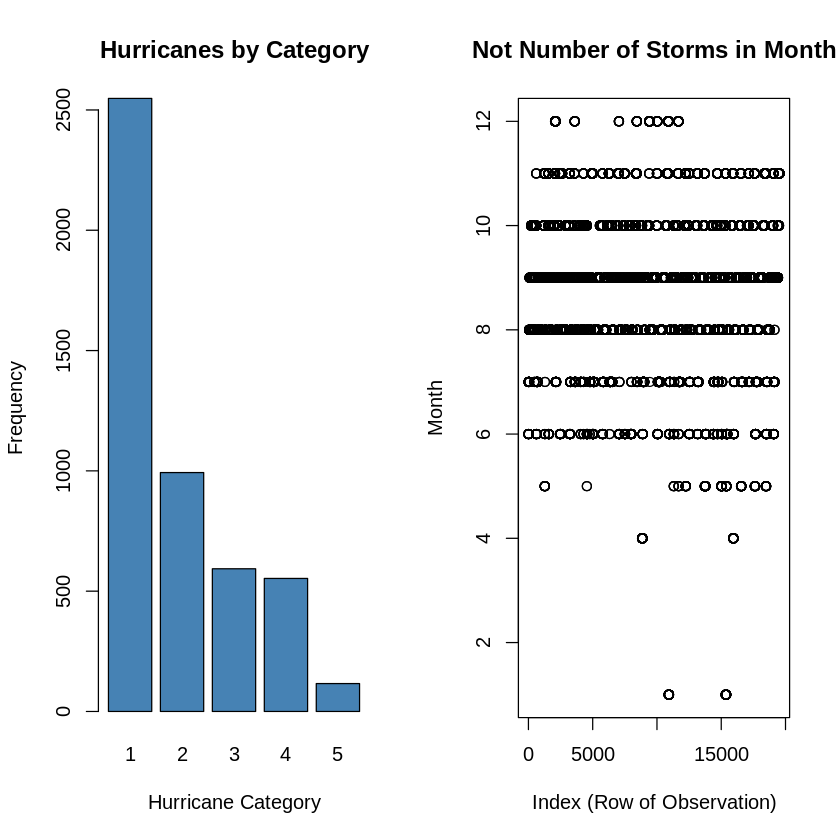

In [ ]:
# plots appear in an array with 1 row and 2 columns
par(mfrow = c(1, 2))  # create an array of plots

plot(storms$category,  # categorical data
     main = "Hurricanes by Category",  # main title
     xlab = "Hurricane Category",  # horizontal axis label
     ylab = "Frequency",  # vertical axis label
     col = "steelblue")  # fill color of bars)

plot(storms$month,  # quantitative data
     main = "Not Number of Storms in Month",  # main title
     xlab = "Index (Row of Observation)",  # horizontal axis label
     ylab = "Month")  # vertical axis label

## <a name="02barplot">Creating Bar Charts and Pie Charts from a Table</a>
---

If we want to keep `month` stored as an integer, but would like to create a visualization to display the number of storms that occurred in each month, we can:

1.  First use the `table()` function to count how many storms occurred in each month.
2.  Then create a bar chart using the `barplot()` function or pie chart using `pie()`.

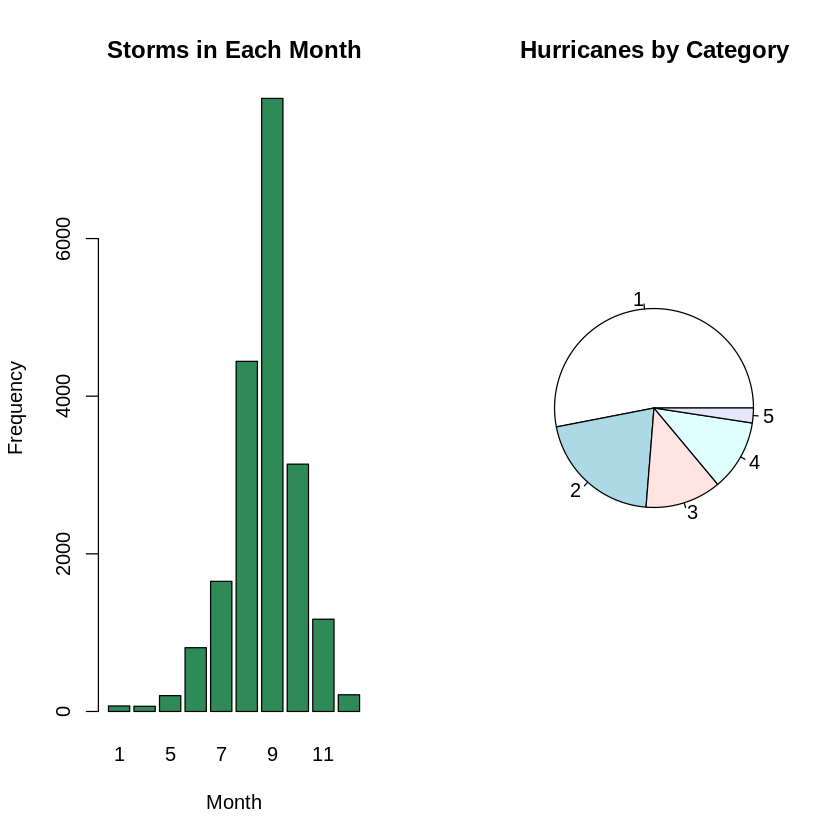

In [ ]:
# plots appear in an array with 1 row and 2 columns
par(mfrow = c(1, 2))  # create an array of plots

month.table <- table(storms$month)  # create table of month counts
category.table <- table(storms$category)  # create table of category counts

barplot(month.table,  # input table of month counts
        main = "Storms in Each Month",  # main title
        xlab = "Month",  # horizontal axis label
        ylab = "Frequency",  # vertical axis label
        col = "seagreen")  # fill color of bars

pie(category.table,  # input table of category counts
    main = "Hurricanes by Category")  # main title

Note, `pie()` and `barplot()` both take tables as inputs. Even if a variable is stored as a `factor`, we need to store the counts in a table first.

-   The `category` variable in `storms` is stored as a factor, but the code below still crashes.

In [ ]:
# see what happens if input is not a table
pie(storms$category)

ERROR: Error in pie(storms$category): 'x' values must be positive.


# <a name="02two-cat">Relationship Between Two Categorical Variables</a>
---

Imagine we would like to compare the number of different category
hurricanes that occurred in each month. In this case, we would like to
compare two qualitative variables, namely `category` and `month`.



## <a name="02grouped">Grouped Frequency Bar Charts</a>
---

To create a bar chart displaying the number of category hurricanes that occurred in each month:

1.  First create a two-way table of counts.
  -   The second variable (`month`) is displayed on horizontal axis.
  -   We get a separate bar for each level of the first variable (`category`).

2.  Input the table into the `barplot()` function.
  -   Note the option `beside = TRUE` groups the bars for each month.
  -   The default option `beside = FALSE` stacks the bars.

In [ ]:
# two-way table of counts of category in each month
cat.table <- table(storms$category, storms$month)  # gives counts

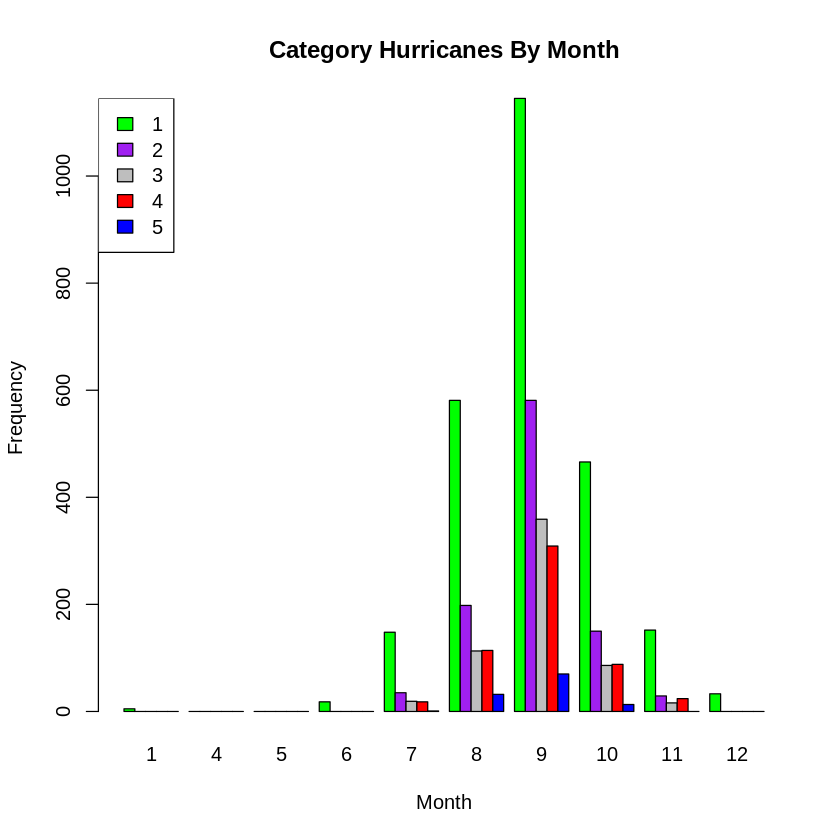

In [ ]:
# create a vector of colors
my.colors <- c("green", "purple", "grey", "red", "blue")

# create side by side bar chart
barplot(cat.table,  # use counts from contingency table
        beside = TRUE,  # groups side-by-side
        main = "Category Hurricanes By Month",  # main title
        xlab = "Month",  # horizontal axis label
        col = my.colors,  # fill color of bars
        ylab = "Frequency")  # vertical axis label

# add a legend to plot
legend(x="topleft",  # place legend in top left
       legend=rownames(cat.table),  # get labels from row name in contingency table
       fill = my.colors)  # use same fill colors

## <a name="02stacked">Stacked Relative Frequency Bar Charts</a>
---

To create a bar chart displaying the relative frequency (or proportion)
of category hurricanes that occurred in each month:

1.  First create a two-way table of relative frequencies.
  -   Pay attention to whether you want the proportions relative to grand, row, or column totals.

2.  Input the table into the `barplot()` function.
  -   The default option `beside = FALSE` stacks the bars.

In [ ]:
cat.grand <- prop.table(cat.table)  # gives proportions relative to grand total
cat.row <- prop.table(cat.table, 1)  # gives proportions relative to row totals
cat.col <- prop.table(cat.table, 2)  # gives proportions relative to column totals

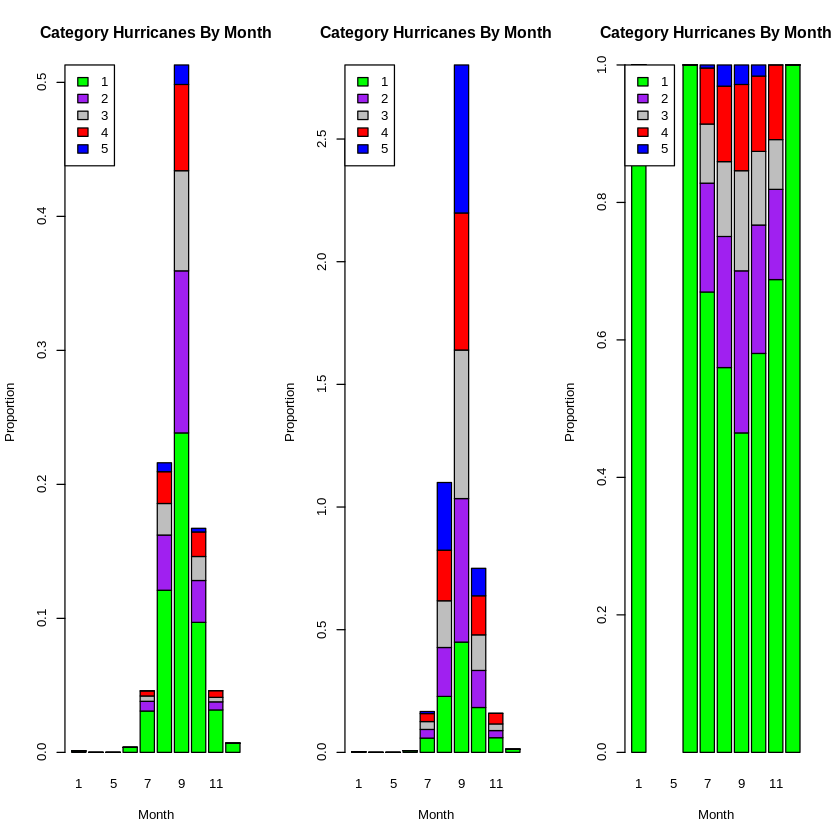

In [ ]:
# create a vector of colors
#my.colors <- c("green", "purple", "grey", "red", "blue")

par(mfrow = c(1, 3))  # create an array of plots

# create stacked bar chart 1
barplot(cat.grand,  # use proportions from contingency table
        main = "Category Hurricanes By Month",  # main title
        xlab = "Month",  # horizontal axis label
        col = my.colors,  # color of bars
        ylab = "Proportion")  # vertical axis label

# add legend to plot
legend(x="topleft",  # place legend in top left
       legend=rownames(cat.grand),  # get labels
       fill = my.colors)  # use same colors

##########

# create stacked bar chart 2
barplot(cat.row,  # use proportions from contingency table
        main = "Category Hurricanes By Month",  # main title
        xlab = "Month",  # horizontal axis label
        col = my.colors,  # color of bars
        ylab = "Proportion")  # vertical axis label

# add legend to plot
legend(x="topleft",  # place legend in top left
       legend=rownames(cat.row),  # get labels
       fill = my.colors)  # use same colors

###########

# create stacked bar chart 3
barplot(cat.col,  # use proportions from contingency table
        main = "Category Hurricanes By Month",  # main title
        xlab = "Month",  # horizontal axis label
        col = my.colors,  # color of bars
        ylab = "Proportion")  # vertical axis label

# add legend to plot
legend(x="topleft",  # place legend in top left
       legend=rownames(cat.col),  # get labels
       fill = my.colors)  # use same colors

<font color="tomato">*Note: A proportion greater than 1 in the middle bar chart means, for example, the sum of the all September proportions (one relative to each category total) adds up to $2.8$ since in 4 out of the 5 possible hurricane categories September accounts for over half the total.*</font>

## <a name="02q4">Question 4</a>
---

Based on the three plots generated in the previous code cell, answer the questions below.

<font color="dodgerblue">a.</font>  Which month has the most hurricanes?

<font color="dodgerblue">b.</font>  In which month is the proportion of category 1 hurricanes greatest?

### <a name="02sol4">Solution to Question 4</a>
---


a. To answer this question, we can use the first stacked relative frequency bar chart whose proportions are relative to the grand total of all hurricanes observed in `storms`. September (month 9) has the tallest bar, so it has the greatest total number of hurricanes since it's proportion (relative to the total number of hurricanes) is greatest.

b. We summarize information from each of the three stacked relative frequency bar charts

- In the plot on the left, we see September has the  most category 1 hurricanes, but it also had the most overall hurricanes. Relatively speaking, the bar over July in the left plot has a greater proportion of green (category 1) than September which also has a lot of category 2, 3, 4, and 5 hurricanes.

- The proportions in the middle plot are relative to the row, which is the category of the hurricane. Although the bar over September has the most green, this is because September has more hurricanes overall. September has greatest proportion of all category 1 storms since September has the most hurricanes overall.

- **The rightmost plot is the most useful since calculating the proportion of category 1 storms relative the number of storms that occur in that month.**
  - January, June, and December all have a bar that seems to be entirely green. This means 100% of the hurricanes in each of January, June, and December were category 1 hurricanes.
  - In September, roughly 50% of hurricanes where category 1.

<br> <br>
  
  



## <a name="02q5">Question 5</a>
---

What are the the differences in the three plots in the output of the
previous code cell? Which of the three bar plots above do you believe
best visualizes the occurrence of different category hurricanes by
month? Which plot do you think is the least useful overall? Explain why.

### <a name="02sol5">Solution to Question 5</a>
---

Since the total number of hurricanes in each month is drastically different, we would want to compare the number category 1 hurricanes relative the total number of hurricanes in each month that is plotted in the rightmost stacked relative frequency bar chart is most useful.

The leftmost plot is relative to the grand total of all hurriances in all months. There larger the bar, the more (in terms of absolute counts) observations of that type.

The center plot is relative to the total of storms in each category. September has the largest green bar in the center plot. This means out of all category 1 storms, September had the most. However, September had lots of other types of hurricanes. Roughly 50% of all hurricanes in September were category 1 which is actually the smallest proportion out of the months that had hurricanes,

<br> <br>

# <a name="02gss-intro">Exploring the General Social Survey Data Set</a>
---

The data set `gss_cat` can be accessed from the `forcats` package. Below
is a quote taken from the website of the [GSS Data Explorer
website](https://gssdataexplorer.norc.org/about) maintained by NORC at
the University of Chicago

> The General Social Survey (GSS) is a project of NORC at the University
> of Chicago, with principal funding from the National Science
> Foundation. Since 1972, the GSS has been monitoring societal change
> and studying the growing complexity of American society.

> The GSS is a publicly available national resource, and is one of the
> most frequently analyzed sources of information in the social
> sciences. GSS Data Explorer is one of many ways that NORC supports the
> dissemination of GSS data for use by legislators, policymakers,
> researchers, educators and others.

In [ ]:
# load the forcats package
library(forcats)

In [ ]:
# open help documentation for gss_cat
?gss_cat

In [ ]:
# get numerical summary of variables
summary(gss_cat)

      year               marital           age                    race      
 Min.   :2000   No answer    :   17   Min.   :18.00   Other         : 1959  
 1st Qu.:2002   Never married: 5416   1st Qu.:33.00   Black         : 3129  
 Median :2006   Separated    :  743   Median :46.00   White         :16395  
 Mean   :2007   Divorced     : 3383   Mean   :47.18   Not applicable:    0  
 3rd Qu.:2010   Widowed      : 1807   3rd Qu.:59.00                         
 Max.   :2014   Married      :10117   Max.   :89.00                         
                                      NA's   :76                            
           rincome                   partyid            relig      
 $25000 or more:7363   Independent       :4119   Protestant:10846  
 Not applicable:7043   Not str democrat  :3690   Catholic  : 5124  
 $20000 - 24999:1283   Strong democrat   :3490   None      : 3523  
 $10000 - 14999:1168   Not str republican:3032   Christian :  689  
 $15000 - 19999:1048   Ind,near dem      :24

## <a name="02q6">Question 6</a>
---

Create a plot to visualize one categorical variable in the `gss_cat`
data set. Based on your plot, comment on any interesting features of the
variable you plotted.

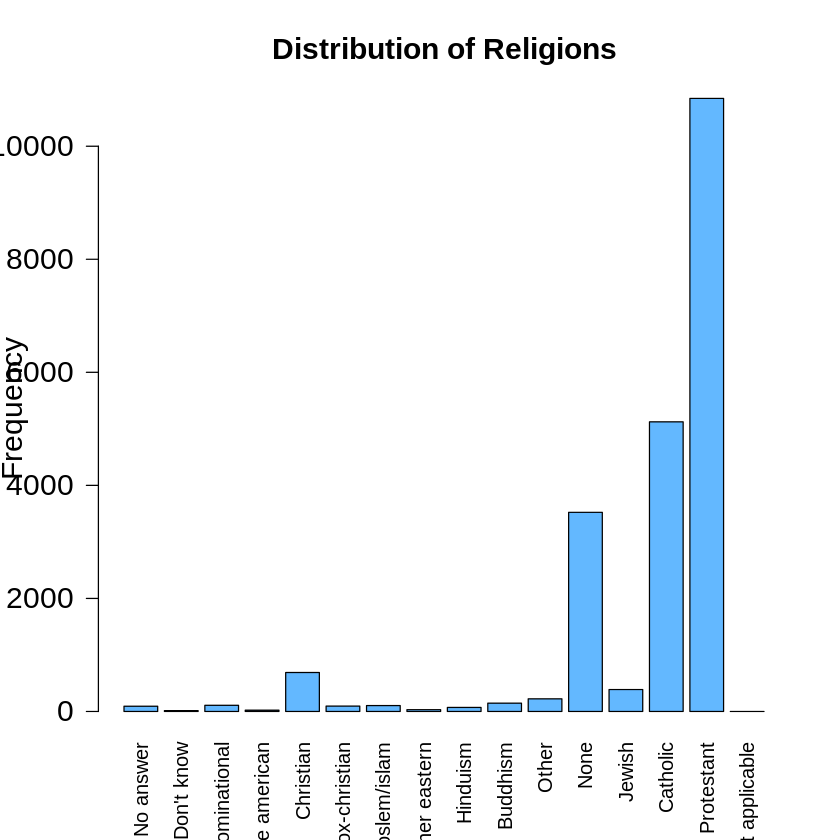

In [ ]:
# create a visualization for one categorical variable
plot(gss_cat$relig,
     las = 2,  # rotate axis labels
     col = "steelblue1",
     main = "Distribution of Religions",  # main title
     ylab = "Frequency",  # vertical axis label
     cex.lab=1.5, cex.axis=1.5, cex.main=1.5)  # increase font size on labels

### <a name="02sol6">Solution to Question 6</a>
---

- The most common religion is Protestant followed by Catholic and no religion.

- Grouping Protestant, Catholic, Christian, and Orthodox-Christian together, we see the vast majority of people identify with some denomination of Christianity.


<br> <br>
  



## <a name="02q7">Question 7
---

Create a plot to visualize the relationship between two categorical
variables in the `gss_cat` data set. Based on your plot, comment on any
interesting features or relations between two the variables you plotted.

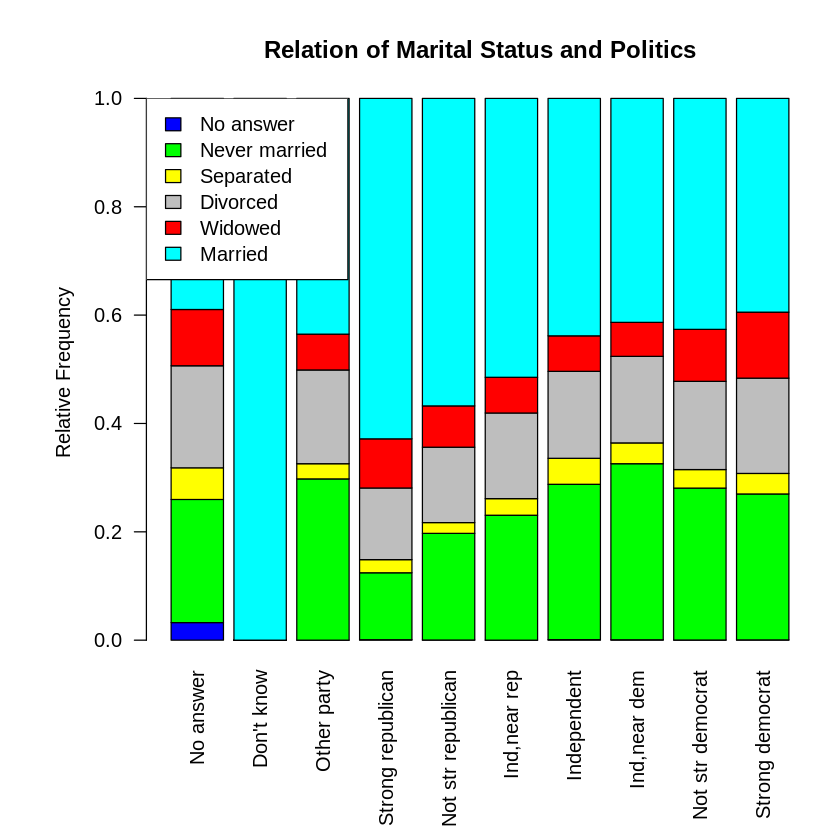

In [ ]:
# create a visualization to illustrate the relation
# between two categorical variables
par(mar=c(8,6,4,1)+.1)  # adjust margins

gss.table <- table(gss_cat$marital, gss_cat$partyid)  # gives counts
gss.row <- prop.table(gss.table, 2)  # gives proportions relative to partyid totals

my.colors <- c("blue", "green", "yellow", "gray", "red", "cyan")


# create stacked bar chart
barplot(gss.row,  # use proportions from contingency table
        main = "Relation of Marital Status and Politics",  # main title
        col = my.colors,  # color of bars
        las = 2,  # rotate axis labels
        ylab = "Relative Frequency")  # vertical axis label

# add legend to plot
legend(x="topleft",  # place legend in top left
       legend=rownames(gss.table),  # get labels
       fill = my.colors)  # use same colors

### <a name="02sol7">Solution to Question 7</a>
---

- Roughly 100% of the people who responded they are unsure (don't know) of their political affiliation are married.

- The three Republican catgories have a larger proportion of cyan coloring compared to the three categories of Democrats.
  - The more strongly a person associates as a Republican, the higher the likelihood they are married.
- The three Democrat categories have less cyan (compared to Republican bars) and a larger proportion of green. This means Democrats are a little more likely to be single than Republicans.

<br> <br>
  



# <a name="CC License">Creative Commons License Information</a>
---

![Creative Commons
License](https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png)

*Statistical Methods: Exploring the Uncertain* by [Adam
Spiegler (University of Colorado Denver)](https://github.com/CU-Denver-MathStats-OER/Statistical-Theory)
is licensed under a [Creative Commons
Attribution-NonCommercial-ShareAlike 4.0 International
License](http://creativecommons.org/licenses/by-nc-sa/4.0/). This work is funded by an [Institutional OER Grant from the Colorado Department of Higher Education (CDHE)](https://cdhe.colorado.gov/educators/administration/institutional-groups/open-educational-resources-in-colorado).

For similar interactive OER materials in other courses funded by this project in the Department of Mathematical and Statistical Sciences at the University of Colorado Denver, visit <https://github.com/CU-Denver-MathStats-OER>.